# Introduction to Sampling

Learn what sampling is and why it is so powerful. You’ll also learn about the problems caused by convenience sampling and the differences between true randomness and pseudo-randomness.

# 1. Sampling and point estimates

<b>1.1 Reasons for sampling</b>

Sampling is an important technique in your statistical arsenal. It isn't always appropriate though—you need to know when to use it and when to work with the whole dataset.

Which of the following is not a good scenario to use sampling?

Possible Answers:
- You've been handed one terabyte of data about error logs for your company's device. (True)

- You wish to learn about the travel habits of all Pakistani adult citizens.

- You've finished collecting data on a small study of the wing measurements for 10 butterflies.

- You are working to predict customer turnover on a big data project for your marketing firm.

Ten butterflies is a small dataset, so sampling isn't useful here.

<b>1.2 Simple sampling with pandas</b>

Throughout this chapter, you'll be exploring song data from Spotify. Each row of this population dataset represents a song, and there are over 40,000 rows. Columns include the song name, the artists who performed it, the release year, and attributes of the song like its duration, tempo, and danceability. You'll start by looking at the durations.

Your first task is to sample the Spotify dataset and compare the mean duration of the population with the sample.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
spotify_population = pd.read_feather("C:\\Users\\yazan\\Desktop\\Data_Analytics\\8-Sampling in Python\Datasets\\spotify_2000_2020.feather")

In [3]:
# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(n=1000)

# Print the sample
print(spotify_sample)

# Calculate the mean duration in mins from spotify_population
mean_dur_pop = spotify_population['duration_minutes'].mean()

# Calculate the mean duration in mins from spotify_sample
mean_dur_samp = spotify_sample['duration_minutes'].mean()

# Print the means
print(mean_dur_pop)
print(mean_dur_samp)

       acousticness                    artists  danceability  duration_ms  \
8132         0.4470             ['Kiana Ledé']         0.789     181267.0   
4829         0.0561  ['Red Hot Chili Peppers']         0.671     205733.0   
22191        0.2340      ['Justin Timberlake']         0.574     484147.0   
23350        0.1030  ['Explosions In The Sky']         0.279     496573.0   
41177        0.0760           ['Daddy Yankee']         0.899     234320.0   
...             ...                        ...           ...          ...   
6387         0.6210             ['Nelson Ned']         0.435     184227.0   
447          0.4790            ['Tito Nieves']         0.815     204307.0   
16249        0.5130                 ['Future']         0.794     167573.0   
9069         0.0235                   ['E-40']         0.600     228013.0   
20294        0.5950          ['Petit Biscuit']         0.772     273162.0   

       duration_minutes  energy  explicit                      id  \
8132  

<b>1.3 Simple sampling and calculating with NumPy</b>

You can also use numpy to calculate parameters or statistics from a list or pandas Series.

You'll be turning it up to eleven and looking at the loudness property of each song.

In [4]:
# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population['loudness']

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)

# Calculate the mean of loudness_pop
mean_loudness_pop = np.mean(loudness_pop)

# Calculate the mean of loudness_samp
mean_loudness_samp = np.mean(loudness_samp)

# Print the means
print(mean_loudness_pop)
print(mean_loudness_samp)

-7.366856851353947
-6.7744100000000005


# 2. Convenience sampling

<b>2.1 Are findings from the sample generalizable?</b>

Sampling—collecting data using the easiest method like(finding the average population age in France by asking a sample of people visiting Disneyland) can result in samples that aren't representative of the population. Equivalently, this means findings from the sample are not generalizable to the population. Visualizing the distributions of the population and the sample can help determine whether or not the sample is representative of the population.

The Spotify dataset contains an acousticness column, which is a confidence measure from zero to one of whether the track was made with instruments that aren't plugged in. You'll compare the acousticness distribution of the total population of songs with a sample of those songs.

Plot a histogram of the acousticness from spotify_population with bins of width 0.01 from 0 to 1 using pandas .hist().

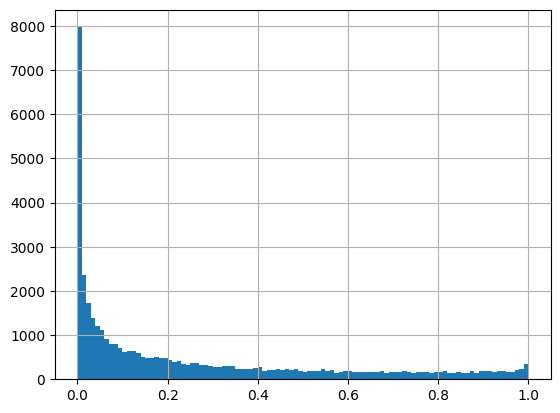

In [5]:
# Visualize the distribution of acousticness with a histogram
spotify_population['acousticness'].hist(bins=np.arange(0, 1.01, 0.01))
plt.show()

Update the histogram code to use the spotify_mysterious_sample dataset.

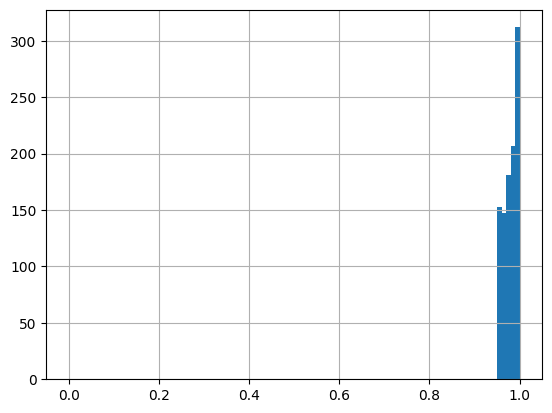

In [6]:
spotify_mysterious_sample = spotify_population[spotify_population['acousticness']>=0.951].sample(n=1000)

# Update the histogram to use spotify_mysterious_sample
spotify_mysterious_sample['acousticness'].hist(bins=np.arange(0, 1.01, 0.01))
plt.show()

<b>Question</b>

Compare the two histograms you drew. Are the acousticness values in the sample generalizable to the general population?

Possible Answers

- Yes. Any sample should lead to a generalizable result about the population.

- Yes. The sample selected is likely a random sample of all songs in our population.

- No. Samples can never lead to generalizable results about the population.

- No. The acousticness samples are consistently higher than those in the general population. (True)

- No. The acousticness samples are consistently lower than those in the general population.

The acousticness values in the sample are all greater than 0.95, whereas they range from 0 to 1 in the whole population.

<b>2.2 Are these findings generalizable?</b>

Let's look at another sample to see if it is representative of the population. This time, you'll look at the duration_minutes column of the Spotify dataset, which contains the length of the song in minutes.

Plot a histogram of duration_minutes from spotify_population with bins of width 0.5 from 0 to 15 using pandas .hist().

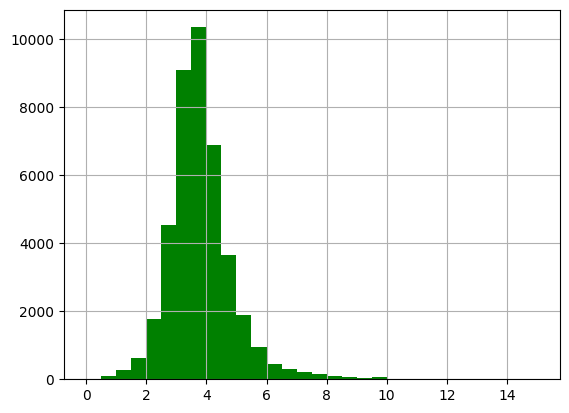

In [7]:
# Visualize the distribution of duration_minutes as a histogram
spotify_population['duration_minutes'].hist(bins=np.arange(0, 15.5, 0.5), color = 'green')
plt.show()

Update the histogram code to use the spotify_mysterious_sample2 dataset, which is a sample contains 50 rows from the 
spotify_sample dataset and the minimum duration in minutes is 0.8079999999999999 min and the maximum is 9.882 min.

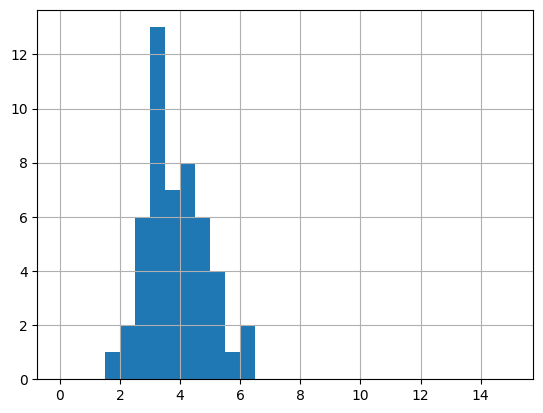

In [8]:
# Update the histogram to use spotify_mysterious_sample2
spotify_mysterious_sample2 = spotify_population[spotify_population['duration_minutes'] >=0.8079999999999999].sample(n=50)
spotify_mysterious_sample2['duration_minutes'].hist(bins=np.arange(0, 15.5, 0.5))
plt.show()

<b>Question</b>

Compare the two histograms you drew. Are the duration values in the sample generalizable to the general population?

Possible Answers

- Yes. Any sample should lead to a generalizable result about the population.

- Yes. The sample selected is likely a random sample of all songs in the population. (True)

- No. Samples can never lead to generalizable results about the population.

- No. The duration samples are consistently higher than those in the general population.

- No. The duration samples are consistently lower than those in the general population.

The duration values in the sample show a similar distribution to those in the whole population, so the results are generalizable. Because the sample selected is likely a random sample of all songs in the population

# 3. Pseudo-random number generation

<b>3.1 Generating random numbers</b>

You've used .sample() to generate pseudo-random numbers from a set of values in a DataFrame. A related task is to generate random numbers that follow a statistical distribution, like the uniform distribution or the normal distribution.

Each random number generation function has distribution-specific arguments and an argument for specifying the number of random numbers to generate

[-0.79766724  0.99308091  0.34002949 ...  0.05781943  2.20447104
  0.69114316]
[9.09120807 5.33437432 4.72255269 ... 8.48810597 5.31512756 3.82724304]


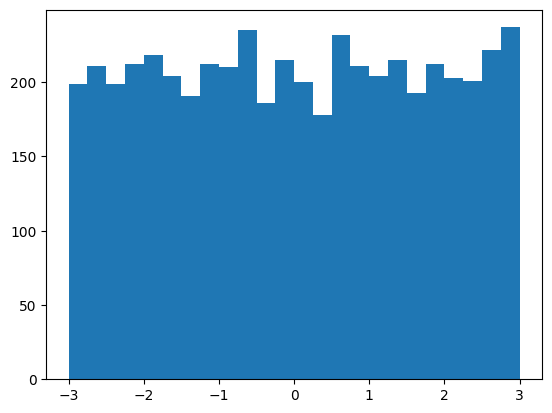

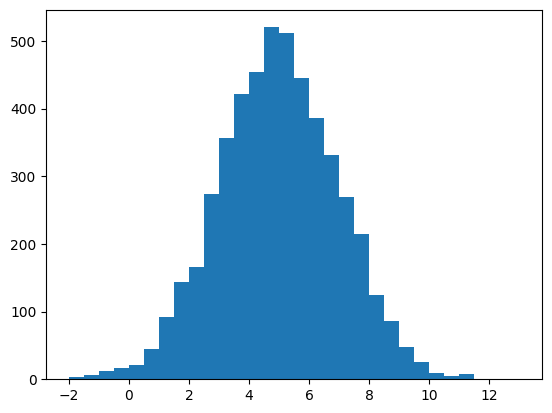

In [11]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Print normals
print(uniforms)

# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale=2, size=5000)

# Print normals
print(normals)

# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Plot a histogram of uniform values, binwidth 0.25
plt.hist(uniforms, bins=np.arange(-3, 3.25, 0.25))
plt.show()

# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale=2, size=5000)

# Plot a histogram of normal values, binwidth 0.5
plt.hist(normals, bins=np.arange(-2, 13.5, 0.5))
plt.show()

<b>3.2 Understanding random seeds</b>

While random numbers are important for many analyses, they create a problem: the results you get can vary slightly. This can cause awkward conversations with your boss when your script for calculating the sales forecast gives different answers each time.

Setting the seed for numpy's random number generator helps avoid such problems by making the random number generation reproducible.

Question
Which statement about x and y is true?

In [15]:
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
y = np.random.normal(size=5)
print(x)
print(y)

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]
[ 1.65143654 -2.42667924 -0.42891263  1.26593626 -0.8667404 ]


Possible Answers

- x and y have identical values.

- The first value of x is identical to the first value of y, but other values are different.

- The values of x are different from those of y. (True)

In [16]:
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
np.random.seed(123)
y = np.random.normal(size=5)
print(x)
print(y)

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]
[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]


Question
Which statement about x and y is true?

Possible Answers

- x and y have identical values. (True)

- The first value of x is identical to the first value of y, but other values are different.

- The values of x are different from those of y. 

In [17]:
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
np.random.seed(456)
y = np.random.normal(size=5)

Question
Which statement about x and y is true?

Possible Answers

- x and y have identical values. 

- The first value of x is identical to the first value of y, but other values are different. (True)

- The values of x are different from those of y. 